In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
import math
PI2 = 2 * math.pi

class PH(thinkdsp.Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def _evaluate(self, ts, freqs):
        """Helper function that evaluates the signal.

        ts: float array of times
        freqs: float array of frequencies during each interval
        """
        dts = np.diff(ts)
        dps = PI2 * freqs * dts
        phases = np.cumsum(dps)
        phases = np.insert(phases, 0, 0)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

In [7]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=10000)
wave.apodize()
wave.make_audio()

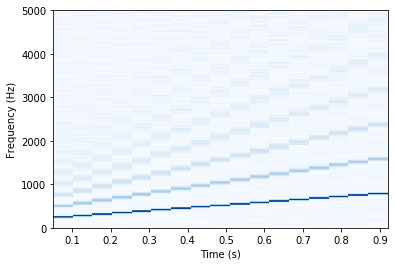

In [8]:
sp = wave.make_spectrogram(1024)
sp.plot()
thinkplot.config(xlabel='Time (s)', ylabel='Frequency (Hz)')

In [25]:
import thinkdsp as td

x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x

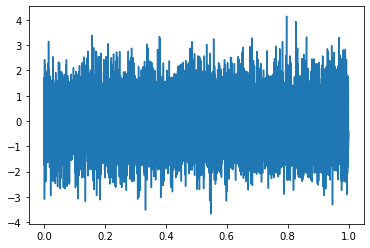

In [24]:
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)

In [10]:
x.ts, x.ys
x.ys.shape

(10000,)

In [11]:
x.ys.max(), x.ys.mean(), x.ys.std()

(4.145411520957629, 0.00786352780877286, 0.9869797284638707)

In [12]:
sx= x.make_spectrum()
sx.fs, sx.hs 
sx.hs.shape

(5001,)

In [13]:
Sx= sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

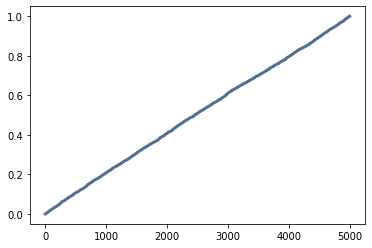

In [14]:
Sx.plot_power()

In [15]:

Sx.estimate_slope()

LinregressResult(slope=0.9761186051613816, intercept=-8.317024643556866, rvalue=0.9998831881981806, pvalue=0.0, stderr=0.00021105754137743345)

In [16]:
y= x.cumsum()
x.ys.shape, y.ys.shape

((10000,), (10000,))

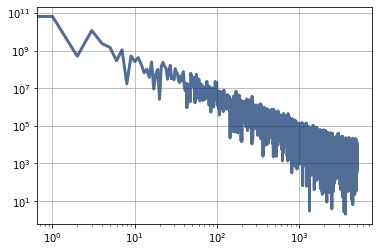

In [26]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

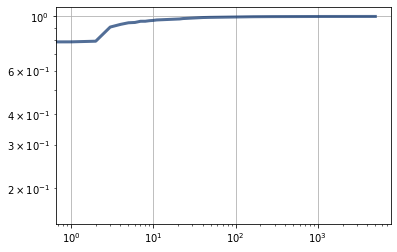

In [27]:
sy.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [28]:
sy.make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.002328102051190634, intercept=-0.01815767200313823, rvalue=0.4167336454819391, pvalue=2.5288708394008266e-209, stderr=7.183281548417548e-05)

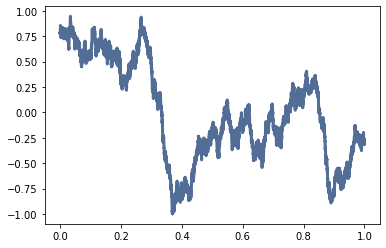

In [29]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [30]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.005452979077245663, intercept=-0.042245459241853925, rvalue=0.2759241165967444, pvalue=4.6493955673938325e-88, stderr=0.000268689384928997)

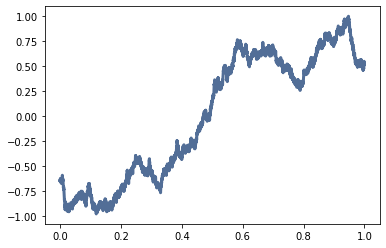

In [31]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [32]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.0017079291182166365, intercept=-0.013277373518132634, rvalue=0.3234454433238543, pvalue=4.093889143876099e-122, stderr=7.067651276177153e-05)

In [33]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [34]:

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


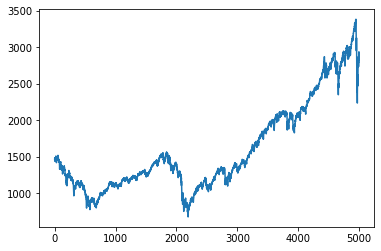

In [35]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

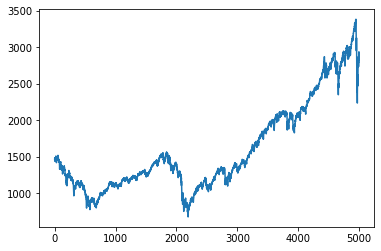

In [36]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [37]:
yWave= td.Wave(ys, framerate= 10000)

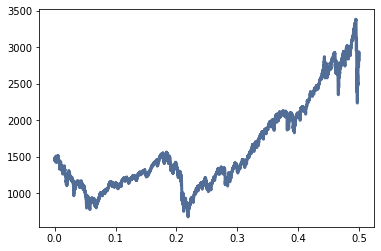

In [38]:
yWave.plot()

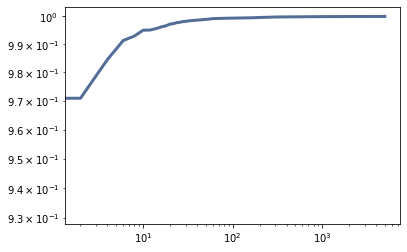

In [39]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')

In [40]:
yWave.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.00032118267557806565, intercept=-0.0025138728815941023, rvalue=0.42786931354255375, pvalue=7.735021238915466e-112, stderr=1.3574898947827898e-05)

In [41]:
# integrated_spectrum 之 log-log slope= .0003 近似於 0，
# 因此 yWave 近似Brownian Noise